## 1. Chuẩn bị dữ liệu

![alt text](https://i.imgur.com/HRhd2Y0.png)

In [1]:
import pandas as pd
import os
import traceback

# --- CẤU HÌNH ---
data_folder = "./data/" 
# ----------------

dataframes = {}

print(f"Bắt đầu quét và đọc các tệp CSV từ thư mục: '{os.path.abspath(data_folder)}'")
print("-" * 30)

if not os.path.isdir(data_folder):
    print(f"ERROR: Không tìm thấy thư mục '{data_folder}'.")
    print("Hãy đảm bảo bạn đã tải dữ liệu vào đúng thư mục này.")
else:
    for item_name in os.listdir(data_folder):
        item_path = os.path.join(data_folder, item_name)

        if os.path.isfile(item_path) and item_name.lower().endswith(".csv"):
            print(f"Đang xử lý tệp: '{item_name}'")
            try:
                # --- Tạo tên DataFrame động (ĐÃ CẬP NHẬT) ---
                base_name = os.path.splitext(item_name)[0]

                # Loại bỏ tiền tố 'olist_'
                if base_name.startswith('olist_'):
                    name_without_prefix = base_name[len('olist_'):] # Cắt bỏ 'olist_'
                else:
                    name_without_prefix = base_name 

                # Loại bỏ hậu tố '_dataset'
                if name_without_prefix.endswith('_dataset'):
                    clean_name = name_without_prefix[:-len('_dataset')] # Cắt bỏ '_dataset'
                else:
                    clean_name = name_without_prefix 

                # Tạo tên DataFrame
                df_variable_name = f"df_{clean_name}"
                # ---------------------------------------------

                # Đọc tệp CSV vào DataFrame
                df = pd.read_csv(item_path)

                # Lưu DataFrame vào dictionary với tên đã tạo
                dataframes[df_variable_name] = df

                print(f"  -> Đã đọc thành công vào DataFrame: '{df_variable_name}' (Shape: {df.shape})")

            except Exception as e:
                # In lỗi nếu không đọc được tệp và tiếp tục với tệp tiếp theo
                print(f"  !! LỖI khi đọc tệp '{item_name}': {e}")
                traceback.print_exc()
        else:
            if os.path.isfile(item_path):
                 print(f"Bỏ qua (không phải CSV): '{item_name}'")

print("-" * 30)
print("Hoàn tất quá trình đọc dữ liệu.")

Bắt đầu quét và đọc các tệp CSV từ thư mục: '/workspaces/Brazilian-E-Commerce-Analysis/data'
------------------------------
Đang xử lý tệp: 'olist_order_reviews_dataset.csv'
  -> Đã đọc thành công vào DataFrame: 'df_order_reviews' (Shape: (99224, 7))
Đang xử lý tệp: 'olist_orders_dataset.csv'
  -> Đã đọc thành công vào DataFrame: 'df_orders' (Shape: (99441, 8))
Đang xử lý tệp: 'olist_customers_dataset.csv'
  -> Đã đọc thành công vào DataFrame: 'df_customers' (Shape: (99441, 5))
Đang xử lý tệp: 'olist_order_items_dataset.csv'
  -> Đã đọc thành công vào DataFrame: 'df_order_items' (Shape: (112650, 7))
Đang xử lý tệp: 'olist_order_payments_dataset.csv'
  -> Đã đọc thành công vào DataFrame: 'df_order_payments' (Shape: (103886, 5))
Đang xử lý tệp: 'olist_products_dataset.csv'
  -> Đã đọc thành công vào DataFrame: 'df_products' (Shape: (32951, 9))
Đang xử lý tệp: 'olist_geolocation_dataset.csv'
  -> Đã đọc thành công vào DataFrame: 'df_geolocation' (Shape: (1000163, 5))
Đang xử lý tệp: 'olis

## 2. Làm sạch dữ liệu

In [2]:
for i, df in enumerate(dataframes):
    print(f'{i+1}. DataFrame: {df}')
    display(dataframes[df].head())
    print('\n')

1. DataFrame: df_order_reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53




2. DataFrame: df_orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00




3. DataFrame: df_customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP




4. DataFrame: df_order_items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14




5. DataFrame: df_order_payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45




6. DataFrame: df_products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0




7. DataFrame: df_geolocation


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP




8. DataFrame: df_sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP




9. DataFrame: df_product_category_name_translation


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### 2.1. DataFrame: customers

In [3]:
customers = dataframes['df_customers']

In [4]:
# Dữ liệu bảng customers
display(customers.head())

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# Thông tin tổng quan
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


=> Bảng **customers** không có giá trị thiếu

In [6]:
# Kiểm tra dữ liệu không hợp lệ
print(f'Số lượng giá trị \'customer_zip_code_prefix\' không hợp lệ: {(customers['customer_zip_code_prefix'] < 0).sum()}')
print(f'Số thành phố: {len((customers['customer_city']).unique())}')
print(f'Số tiểu bang: {len((customers['customer_state']).unique())}')

Số lượng giá trị 'customer_zip_code_prefix' không hợp lệ: 0
Số thành phố: 4119
Số tiểu bang: 27


In [7]:
# Kiểm tra giá trị trùng lặp
print(f'Số lượng giá trị trùng lặp: {customers.duplicated().sum()}')

Số lượng giá trị trùng lặp: 0


=> Không có giá trị trùng lặp

### 2.2. DataFrame: geolocation

In [8]:
geolocation = dataframes['df_geolocation']

In [9]:
# Dữ liệu bảng
display(geolocation.head())

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [10]:
# Thông tin tổng quan
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


=> Bảng không có giá trị thiếu

In [11]:
print(f'Số lượng thành phố: {len((geolocation['geolocation_city']).unique())}')
print(f'Số tiểu bang: {len((geolocation['geolocation_state']).unique())}')

Số lượng thành phố: 8011
Số tiểu bang: 27


In [12]:
# Kiểm tra giá trị trùng lặp
print(f'Số lượng giá trị trùng lặp: {geolocation.duplicated().sum()}')

Số lượng giá trị trùng lặp: 261831


In [13]:
# Loại bỏ các giá trị trùng lặp
geolocation = geolocation.drop_duplicates()
print(f'Số lượng giá trị trùng lặp: {geolocation.duplicated().sum()}')

Số lượng giá trị trùng lặp: 0


### 2.3. DataFrame: order items

In [14]:
order_items = dataframes['df_order_items']

In [15]:
# Dữ liệu bảng
display(order_items.head())

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [16]:
# Thông tin tổng quan
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


=> Bảng không có giá trị thiếu

In [17]:
# Chuyển cột về dang datetime
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'], errors='coerce')
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [18]:
# Kiểm tra giá trị trùng lặp
duplicate_count = order_items.duplicated().sum()
print(f'Số lượng giá trị trùng lặp: {duplicate_count}')

if duplicate_count == 0:
    print("=> Bảng không có giá trị trùng lặp")


Số lượng giá trị trùng lặp: 0
=> Bảng không có giá trị trùng lặp


### 2.4. DataFrame: orders

In [19]:
orders = dataframes['df_orders']

In [20]:
# Dữ liệu bảng
display(orders.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [21]:
# Thông tin tổng quan
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [22]:
# Chuyển dữ liệu về dạng datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors='coerce')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors='coerce')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [23]:
# Kiểm tra giá trị trùng lặp
duplicate_count = order_items.duplicated().sum()
print(f'Số lượng giá trị trùng lặp: {duplicate_count}')

if duplicate_count == 0:
    print("=> Bảng không có giá trị trùng lặp")


Số lượng giá trị trùng lặp: 0
=> Bảng không có giá trị trùng lặp


### 2.5. DataFrame: products

In [24]:
products = dataframes['df_products']

In [25]:
# Dữ liệu bảng
display(products.head())

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [26]:
# Thông tin tổng quan
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [27]:
# Kiểm tra giá trị thiếu
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [28]:
# Kiểm tra giá trị trùng lặp
duplicate_count = products['product_id'].duplicated().sum()
print(f'Số lượng giá trị trùng lặp: {duplicate_count}')

if duplicate_count == 0:
    print("=> Bảng không có giá trị trùng lặp")


Số lượng giá trị trùng lặp: 0
=> Bảng không có giá trị trùng lặp


### 2.6. DataFrame: order payments

In [29]:
order_payments = dataframes['df_order_payments']

In [30]:
# Dữ liệu bảng
display(order_payments.head())

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [31]:
# Thông tin tổng quan
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


=> Bảng không giá trị thiếu

In [32]:
# Kiểm tra giá trị trùng lặp
duplicate_count = order_payments.duplicated().sum()
print(f'Số lượng giá trị trùng lặp: {duplicate_count}')

if duplicate_count == 0:
    print("=> Bảng không có giá trị trùng lặp")


Số lượng giá trị trùng lặp: 0
=> Bảng không có giá trị trùng lặp


### 2.7. DataFrame: order reviews

In [33]:
order_reviews = dataframes['df_order_reviews']

In [34]:
# Dữ liệu bảng
display(order_reviews.head())

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [35]:
# Thông tin tổng quan
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [36]:
# Chuyển dữ liệu về dạng datetime
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'], errors='coerce')
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'], errors='coerce')
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [37]:
# Kiểm tra giá trị trùng lặp
duplicate_count = order_reviews.duplicated().sum()
print(f'Số lượng giá trị trùng lặp: {duplicate_count}')

if duplicate_count == 0:
    print("=> Bảng không có giá trị trùng lặp")


Số lượng giá trị trùng lặp: 0
=> Bảng không có giá trị trùng lặp


### 2.8. DataFrame: sellers

In [38]:
sellers = dataframes['df_sellers']

In [39]:
# Dữ liệu bảng
display(sellers.head())

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [40]:
# Thông tin tổng quan
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


=> Bảng không có giá trị thiếu

In [41]:
# Kiểm tra giá trị trùng lặp
duplicate_count = sellers.duplicated().sum()
print(f'Số lượng giá trị trùng lặp: {duplicate_count}')

if duplicate_count == 0:
    print("=> Bảng không có giá trị trùng lặp")


Số lượng giá trị trùng lặp: 0
=> Bảng không có giá trị trùng lặp


### 2.9. DataFrame: product category name translation

In [42]:
product_category_name_translation = dataframes['df_product_category_name_translation']

In [43]:
# Dữ liệu bảng
display(product_category_name_translation.head())

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [44]:
# Thông tin tổng quan
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [45]:
# Kiểm tra giá trị trùng lặp
duplicate_count = product_category_name_translation.duplicated().sum()
print(f'Số lượng giá trị trùng lặp: {duplicate_count}')

if duplicate_count == 0:
    print("=> Bảng không có giá trị trùng lặp")


Số lượng giá trị trùng lặp: 0
=> Bảng không có giá trị trùng lặp


## 3. EDA

### 3.1. Thời gian tiêu dùng

**Mục tiêu**: Nhận diện xu hướng về thời gian để hiểu thói quen mua hàng

In [66]:
# Trích xuất thời gian
orders_filtered = orders[~orders['order_status'].isin(['unavailable', 'canceled'])].copy() # Lọc ra những đơn hàng bị hủy (bởi khách hàng hoặc hệ thống)
orders_filtered['order_purchase_hour'] = orders_filtered['order_purchase_timestamp'].dt.hour
orders_filtered['order_purchase_date'] = orders_filtered['order_purchase_timestamp'].dt.date
orders_filtered['order_purchase_date'] = pd.to_datetime(orders_filtered['order_purchase_date'], errors='coerce')
orders_filtered['order_purchase_month'] = orders_filtered['order_purchase_timestamp'].dt.to_period('M')
orders_filtered['order_purchase_dayofweek'] = orders_filtered['order_purchase_timestamp'].dt.day_of_week

day_map = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}
orders_filtered['order_purchase_day_name'] = orders_filtered['order_purchase_dayofweek'].map(day_map)

In [67]:
orders_filtered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_hour,order_purchase_date,order_purchase_month,order_purchase_dayofweek,order_purchase_day_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,10,2017-10-02,2017-10,0,Mon
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,20,2018-07-24,2018-07,1,Tue
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,8,2018-08-08,2018-08,2,Wed
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,19,2017-11-18,2017-11,5,Sat
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,21,2018-02-13,2018-02,1,Tue


#### Theo tháng

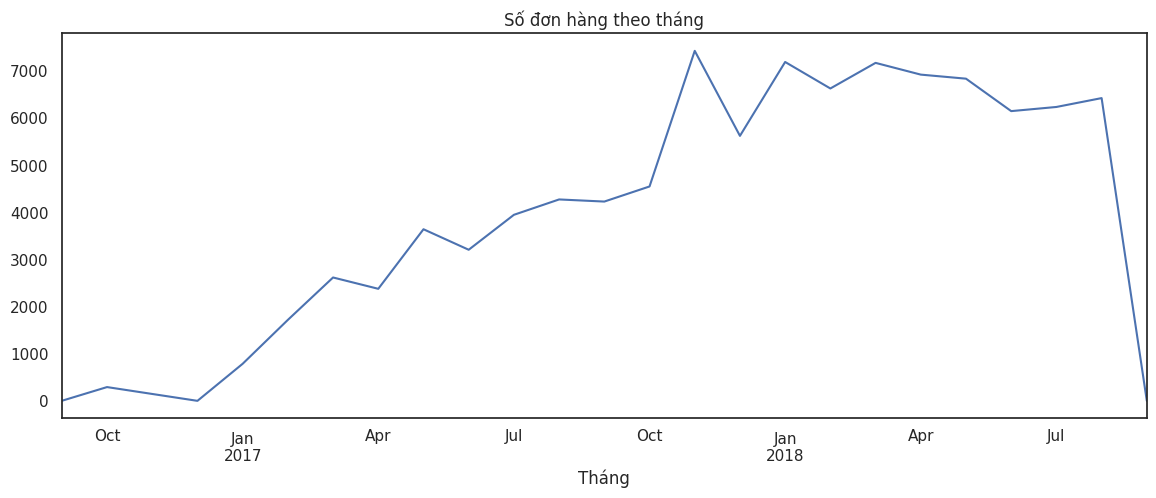

In [68]:
import matplotlib.pyplot as plt

# Số lượng đơn hàng theo tháng
orders_filtered['order_purchase_month'].value_counts().sort_index().plot(kind='line', figsize=(14,5))
plt.title('Số đơn hàng theo tháng')
plt.xlabel('Tháng')
plt.show()

- Những tháng cuối năm 2016 có số lượng đơn rất thấp => Có thể do dữ liệu chưa được ghi nhận đầy đủ
- Số lượng đơn hàng tăng dần từ đầu năm 2017 đến tháng 11/2017
- Ghi nhận lượng đơn hàng đạt đỉnh (hơn 7000 đơn) vào tháng 11/2017 => Có thể liên quan đến dịp Black Friday 
- Lượng đơn hàng trong năm 2018 duy trì tương đối ổn định cho đến tháng 8/2018
- Tháng 9/2018 lượng đơn giảm mạnh đột ngột => Nghi ngờ dữ liệu chưa được ghi nhận đầy đủ, cần kiểm tra lại nguồn dữ liệu để làm rõ nguyên nhân

#### Theo ngày trong tuần

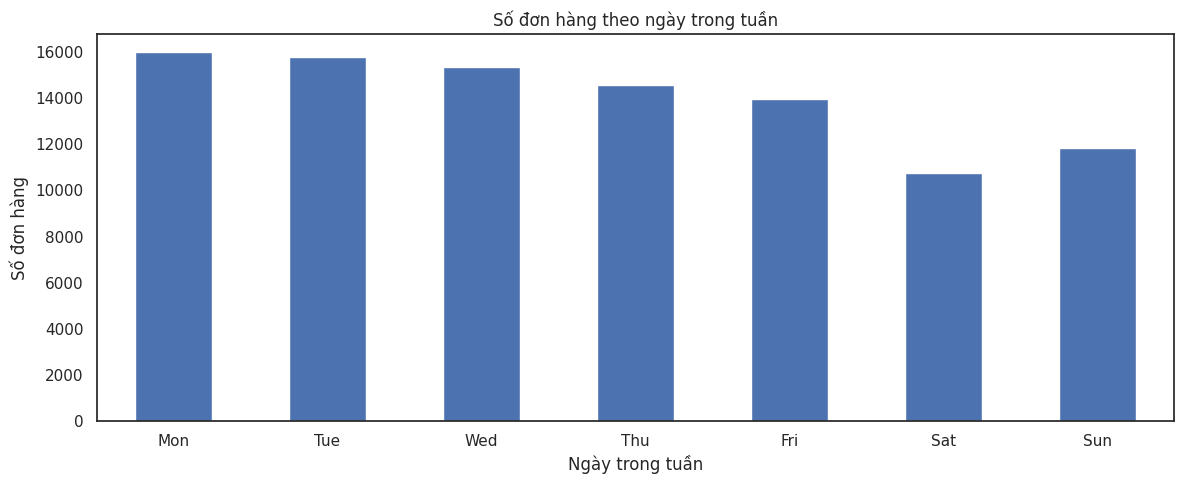

In [70]:
import matplotlib.pyplot as plt

# Số lượng đơn hàng theo ngày trong tuần
orders_by_dayofweek = orders_filtered.groupby('order_purchase_dayofweek')['order_purchase_day_name'].value_counts().sort_index()

x_labels = orders_by_dayofweek.index.get_level_values('order_purchase_day_name').tolist()

orders_by_dayofweek.plot(kind='bar', figsize=(12, 5))
plt.title('Số đơn hàng theo ngày trong tuần')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Số đơn hàng')
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=0)
plt.tight_layout()
plt.show()

- Ngày thứ 2 có lượng đơn đặt hàng cao nhất (~16k đơn), sau đó giảm dần vào các ngày tiếp theo. thứ 7 và Chủ nhật có lượng đơn đặt hàng thấp nhất trong tuần với lần lượt 10.764 đơn vào thứ 7 và 11.831 đơn vào Chủ Nhật
- Khách hàng có xu hướng mua hàng vào các ngày trong tuần
- Việc đơn đặt hàng giảm vào cuối tuần có thể cho thấy khách hàng dành nhiều thời gian hơn có các hoạt động cá nhân, giải trí hay nghỉ ngơi => Việc mua sắm trực tuyến giảm 
- Với xu hướng khách hàng đặt đơn nhiều vào đầu tuần, Olist có thể kết hợp với các nhà bán hàng tung ra các chương trình khuyến mãi, ưu đãi đặc biệt nhằm duy trì và tăng số lượng đơn đặt hàng
- Cần có các chiến dịch kích thích mua sắm vào cuối tuần để cân bằng lượng đơn hàng, chẳng hạn như giảm giá đặc biệt, flash sale hoặc một số gói ưu đãi dành riêng cho cuối tuần

#### Theo ngày

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


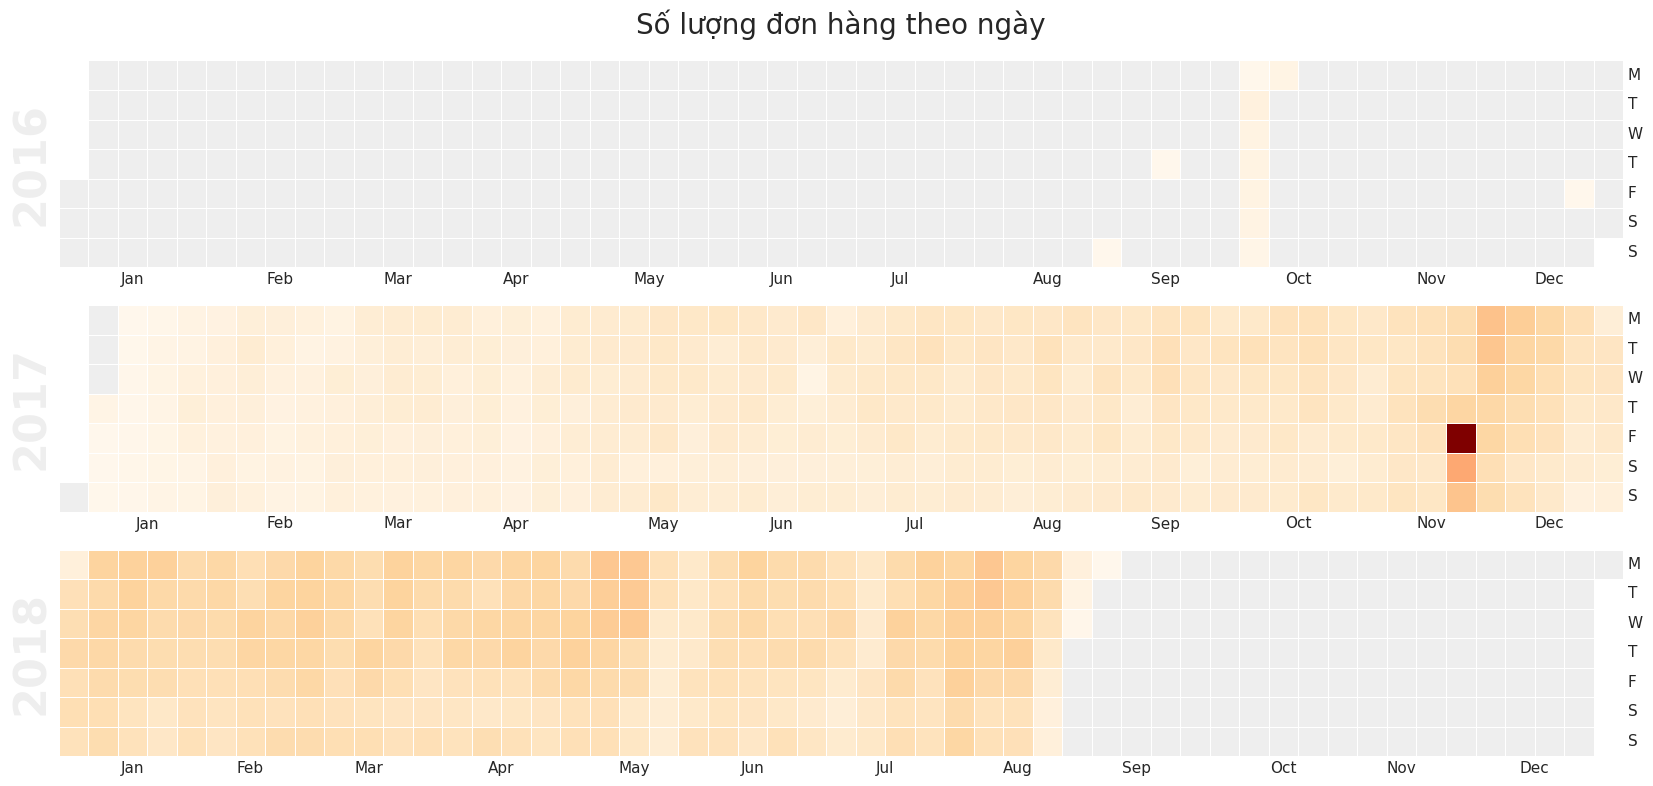

In [58]:
import pandas as pd
import calmap
import matplotlib.pyplot as plt

# Số lượng đơn hàng theo ngày
orders_by_day = orders_filtered['order_purchase_date'].value_counts()
fig,ax = calmap.calendarplot(orders_by_day, monthticks=1, daylabels='MTWTFSS', fillcolor='#EEEEEE',
                             cmap='OrRd', linewidth=0.5, fig_kws=dict(figsize=(20,8)))

fig.suptitle('Số lượng đơn hàng theo ngày', fontsize=20)
fig.tight_layout(rect=[0, 0, 1, 1])
fig.show()

- Có một cụm màu đỏ nổi bật vào cuối tháng 11/2017 -> Đây chính là thời điểm diễn ra ngày lễ **Black Friday**
- Các ngày xung quanh **Black Friday** cũng có lượng đơn hàng cao hơn bình thường
- Các ngày cuối tuần có màu nhạt hơn so với các ngày trong tuần => Khách hàng thường có xu hướng mua hàng vào các ngày trong tuần
- Tính đến tháng 8/2018, lượng đơn hàng hàng ngày khá đồng đều và duy trì ở mức cao. Không có ngày nào nổi bật với lượng mua sắm đặc biệt lớn, ngay cả trong thời gian diễn ra lễ hội Carnival (Cuối tháng 2 - đầu tháng 3).

#### Theo giờ

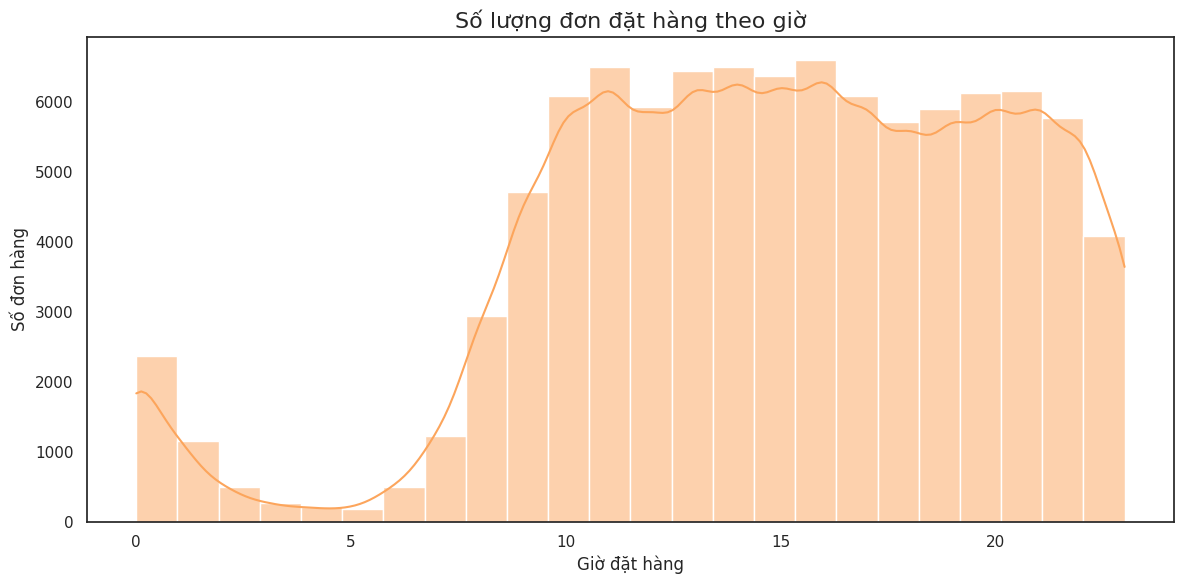

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Số lượng đơn hàng theo giờ
plt.figure(figsize=(12,6))
sns.set_theme(style="white")

sns.histplot(data=orders_filtered, x='order_purchase_hour', bins=24, kde=True, color='#fca55c')

plt.title('Số lượng đơn đặt hàng theo giờ', fontsize=16)
plt.xlabel('Giờ đặt hàng')
plt.ylabel('Số đơn hàng')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


- Hoạt động mua sắm tập trung chủ yếu vào ban ngày và buổi tối
- Vào ban đêm và sáng sớm, hoạt động mua sắm gần như bằng 0
- Số lượng đơn hàng bắt đầu tăng đáng kể từ khoảng 8h sáng và tăng rất nhanh cho đến 11h trưa
- Từ 13h đến khoảng 17h, số lượng đơn đặt hàng luôn ở mức cao và ổn định (luôn duy trì ở mức 6000 đơn/giờ). 
- Lượng đơn hàng có xu hướng giảm nhẹ vào khoảng 16h-17h, thời điểm thường trùng với giờ tan làm. Có thể việc di chuyển và kết thúc ngày làm việc đã tạm thời làm gián đoạn hoạt động mua sắm của khách hàng
- Sau 18h số lượng đơn hàng ghi nhận được có giảm nhẹ so với ban ngày nhưng vẫn duy trì ở mức cao (khoảng 5500 đơn) cho đến 23h 
- Sau 23h lượng đơn hàng bắt đầu giảm mạnh
- Có một lượng đơn hàng đáng chú ý vào lúc 0 giờ (nửa đêm), cao hơn hẳn so với các giờ từ 1h đến 6h sáng, sau đó giảm nhanh chóng.
 
    => Các chương trình khuyến mãi kết thúc muộn vào nửa đêm, thúc đẩy mua hàng vào phút chót.

### 3.2. Giá trị & Tần xuất mua hàng

**Mục tiêu**: Hiểu khả năng chi tiêu của khách hàng, nhận diện khách hàng trung thành

#### Giá trị đơn hàng trung bình

In [73]:
delivered_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_hour,order_purchase_date,order_purchase_month,order_purchase_dayofweek,order_purchase_day_name,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,10,2017-10-02,2017-10,0,Mon,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,20,2018-07-24,2018-07,1,Tue,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,8,2018-08-08,2018-08,2,Wed,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,19,2017-11-18,2017-11,5,Sat,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,21,2018-02-13,2018-02,1,Tue,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,12,2018-02-06,2018-02,1,Tue,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,195.00
110193,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,14,2017-08-27,2017-08,6,Sun,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,271.01
110194,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,21,2018-01-08,2018-01,0,Mon,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,220.58
110195,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,21,2018-01-08,2018-01,0,Mon,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,220.58


In [103]:
delivered_orders = orders[orders['order_status'] == 'delivered'].copy()
delivered_orders = delivered_orders.merge(order_items, how='left', on='order_id')

delivered_orders['revenue'] = delivered_orders['price'] + delivered_orders['freight_value'] # Tổng giá trị của một đơn hàng

96478

In [110]:
revenue_by_order_id = delivered_orders.groupby(['order_id', 'order_purchase_timestamp'])[['price', 'freight_value' ,'revenue']].sum().reset_index() # Tổng giá trị của từng đơn hàng
total_revenue = revenue_by_order_id['revenue'].sum() # Tổng giá trị tất cả các đơn hàng đã giao
order_count = revenue_by_order_id.shape[0] # Số lượng đơn đặt hàng
avg_order_value = total_revenue / order_count # Doanh thu trung bình trên mỗi đơn hàng

print(f'Tổng doanh thu: R${total_revenue:,.2f}')
print(f'Số lượng đơn hàng đã giao: R${order_count:,}')
print(f'Doanh thu trung bình mỗi đơn hàng: R${avg_order_value:,.2f}')
print(f'Đơn hàng có giá trị nhỏ nhất: R${min(revenue_by_order_id['revenue']):,}')
print(f'Đơn hàng có giá trị cao nhất: R${max(revenue_by_order_id['revenue']):,}')

Tổng doanh thu: R$15,419,773.75
Số lượng đơn hàng đã giao: R$96,478
Doanh thu trung bình mỗi đơn hàng: R$159.83
Đơn hàng có giá trị nhỏ nhất: R$9.59
Đơn hàng có giá trị cao nhất: R$13,664.08


In [109]:
revenue_by_order_id['revenue'].describe()

count    96478.000000
mean       159.826839
std        218.794219
min          9.590000
25%         61.850000
50%        105.280000
75%        176.260000
max      13664.080000
Name: revenue, dtype: float64

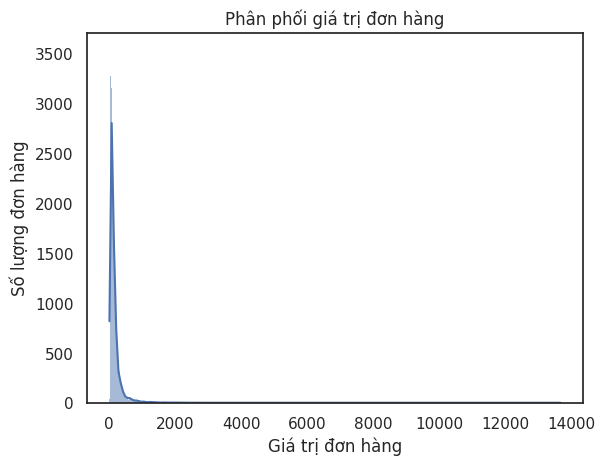

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ histogram phân phối giá trị đơn hàng
sns.histplot(revenue_by_order_id['revenue'], kde=True)
plt.title('Phân phối giá trị đơn hàng')
plt.xlabel('Giá trị đơn hàng')
plt.ylabel('Số lượng đơn hàng')
plt.show()


#### Tần suất mua hàng của khách

#### Tỉ lệ khách mới/khách quay lại